
# Impact of Marketing Campaign on Daily Website Visitors

---


© 2024, Zaka AI, Inc. All Rights Reserved

**Case-Study:** A company claims that their new marketing campaign has increased the average number of daily website visitors. You, as a data analyst, want to investigate whether there is evidence to support this claim.



## Define the  data

The company has collected data about daily website visitors  for the past two weeks (14 days) before and after the marketing campaign. Each day's visitors count is recorded in two separate vectors: before and after.

In [ ]:
before <- c(120, 150, 140, 160, 130, 135, 125, 145, 155, 130, 135, 140, 125, 130)
after <- c(140, 155, 165, 150, 145, 160, 175, 150, 165, 155, 160, 145, 165, 150)

## Setting The Hypotheses
Define the null and alternative hypotheses for this scenario in terms of average daily website visitors.

**Null Hypothesis (H0):** The marketing campaign has not increased the average daily website visitors.

**Alternative Hypothesis (H1):** The marketing campaign has increased the average daily website visitors.


## Conducting the Test
Use t-test to perform a hypothesis test to determine if there is evidence to support the claim that the marketing campaign has increased the average daily website visitors. Use a significance level of 0.05 (αlpha = 0.05).


### T-test from scratch

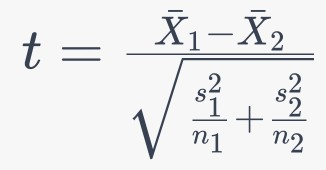

Calculate the components of the t-score formula

In [ ]:
# Step 1: Calculate the sample means for both groups
mean_before <- mean(before)
mean_after <- mean(after)

# Step 2: Calculate the sample variances for both groups, remember that the square of the standard deviation is = variance
var_before <-  var(before)
var_after <-  var(after)

# Step 3: Calculate the sample sizes for both groups
n_before <- length(before)
n_after <- length(after)

# Step 4: Calculate the standard error of the difference between the two means
se_diff <- sqrt(var_before / n_before + var_after / n_after)

Generate the values of the means, t-score, degree of freedom and P-value

In [ ]:
# Step 5: Calculate the t-value
t_value <- (mean_after - mean_before) / se_diff

# Step 6: Calculate the degrees of freedom using the Welch-Satterthwaite equation
numerator <- (var_before / n_before + var_after / n_after)^2
denominator <- ((var_before / n_before)^2 / (n_before - 1)) + ((var_after / n_after)^2 / (n_after - 1))
df <- numerator / denominator


# Step 7: Calculate the p-value for the one-tailed test
# Using the pt function, which gives the cumulative distribution function cdf() for the t-distribution
p_value <- 1 - pt(t_value, df)

# Print the results
cat("Sample Mean (Before):", mean_before, "\n")
cat("Sample Mean (After):", mean_after, "\n")
cat("t-value:", t_value, "\n")
cat("Degrees of Freedom:", df, "\n")
cat("p-value:", p_value, "\n")

Sample Mean (Before): 137.1429 
Sample Mean (After): 155.7143 
t-value: 4.515506 
Degrees of Freedom: 25.07026 
p-value: 6.503605e-05 


Why do you think we tended to use the one-tail version of the T-test instead of the two-tails one?

**Share your Zaka**

**Since the company believes their marketing campaign has increased the number of visitors, they have a specific direction in mind (an increase). Therefore, we use a one-tailed T-test, which tests only for an increase (i.e., whether the "after" group has a higher mean than the "before" group). If the company didn't have a direction (i.e., if they were just testing for any change, whether an increase or decrease), a two-tailed test would be used, which checks for any difference in either direction.**

### T-test using t.test function

Use the t.test() built-in R function to get the p-value

In [ ]:
result <- t.test(before,
                after,
                alternative = "greater")

# Print the results
cat("t-value:", result$statistic, "\n")
cat("Degrees of Freedom:", result$parameter, "\n")
cat("p-value:", result$p.value, "\n")

t-value: -4.515506 
Degrees of Freedom: 25.07026 
p-value: 0.999935 


## Analysing the Result
Print the p-value obtained from the hypothesis test.
Based on the p-value, write a conclusion regarding the company's claim.

In [ ]:
print(result$p.value)

if (result$p.value < 0.05) {
  cat("Based on the p-value of", result$p.value, ", we reject the null hypothesis.")
  cat("There is evidence to support the claim that the marketing campaign has increased the average daily website visitors.")
} else {
  cat("Based on the p-value of", result$p.value, ", we fail to reject the null hypothesis.")
  cat("There is no evidence to support the claim that the marketing campaign has increased the average daily website visitors.")
}

[1] 0.999935
Based on the p-value of 0.999935 , we fail to reject the null hypothesis.There is no evidence to support the claim that the marketing campaign has increased the average daily website visitors.

## Anova Test

In [ ]:
before <- c(120, 150, 140, 160, 130, 135, 125, 145, 155, 130, 135, 140, 125, 130)
campaign_1 <- c(140, 155, 165, 150, 145, 160, 175, 150, 165, 155, 160, 145, 165, 150)
campaign_2 <- c(130, 145, 155, 140, 135, 150, 165, 140, 155, 145, 150, 135, 155, 140)


Combine the 3 vectors in a single data frame, to apply the ANOVA test and get the F-statistic value for the current cases.

In [ ]:
# Combine the data into a data frame
data <- data.frame(
  Visitors = c(before, campaign_1, campaign_2),
  Period = factor(rep(c("Before", "Campaign 1", "Campaign 2"), each = 14))
)

# Perform ANOVA
anova_result <- aov(Visitors ~ Period, data = data)
summary(anova_result)


            Df Sum Sq Mean Sq F value   Pr(>F)    
Period       2   2419  1209.5   10.92 0.000172 ***
Residuals   39   4321   110.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Interpret the results while considering the significance value alpha to be 0.05

In [ ]:
# Get the summary of the ANOVA
summary_anova <- summary(anova_result)

# Extract the p-value based on the F-value and the degree of freedom
anova_p_value <- summary_anova[[1]]$`Pr(>F)`[1]

cat("ANOVA P-Value:", format(anova_p_value, scientific = TRUE, digits = 5), "\n")

if (anova_p_value < 0.05) {
  cat("The p-value is less than 0.05. Reject the null hypothesis.\n")
  cat("This suggests that there is a significant difference in the average number of visitors across the three different groups.\n")
} else {
  cat("The p-value is greater than or equal to 0.05. Fail to reject the null hypothesis.\n")
  cat("This suggests that there is no significant difference in the average number of visitors across the three different groups.\n")
}



ANOVA P-Value: 1.719e-04 
The p-value is less than 0.05. Reject the null hypothesis.
This suggests that there is a significant difference in the average number of visitors across the three different groups.
